In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import random
import time
import matplotlib.pyplot as plt

from skimage.transform import resize
from tqdm import tqdm # progress which the model
import matplotlib.pyplot as plt
%matplotlib inline

2025-12-15 17:37:59.430233: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-15 17:37:59.444520: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-15 17:37:59.567539: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-15 17:37:59.667160: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765831079.747720   10587 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765831079.77

In [2]:
df = pd.read_csv('../GalaxyZoo/training_solutions_rev1.csv')
print("El dataset tiene " + str(df.shape[0]) + " filas y " + str(df.shape[1]) + " columnas.")
df.head()

El dataset tiene 61578 filas y 38 columnas.


,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


## Separamos entre training y testing

In [3]:
df_train, df_test = train_test_split(df[:5000], test_size=0.2, random_state=42)
print("El conjunto de entrenamiento tiene forma", df_train.shape)
print("El conjunto de prueba tiene forma", df_test.shape)

El conjunto de entrenamiento tiene forma (4000, 38)
El conjunto de prueba tiene forma (1000, 38)


In [4]:
df_train.describe()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,137578.972250,0.439269,0.536232,0.024499,0.101693,0.434539,0.099314,0.335225,0.220413,0.214126,...,0.029975,0.096795,0.085579,0.038039,0.015376,0.094151,0.019690,0.007883,0.007386,0.075928
std,21556.505823,0.283672,0.296378,0.036149,0.207260,0.300969,0.169719,0.248053,0.286636,0.174457,...,0.091613,0.149752,0.141137,0.095623,0.052345,0.194633,0.073135,0.040028,0.039611,0.108542
min,100008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,119273.250000,0.184321,0.270564,0.000000,0.000000,0.167668,0.000000,0.121700,0.000000,0.072713,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,137480.000000,0.424811,0.553333,0.014616,0.000000,0.392431,0.000000,0.289144,0.099837,0.176419,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,156659.000000,0.692395,0.802799,0.033285,0.081488,0.696057,0.132510,0.524563,0.338511,0.330474,...,0.000000,0.155848,0.131607,0.029464,0.000000,0.096665,0.000000,0.000000,0.000000,0.133793
max,174391.000000,1.000000,1.000000,0.778000,0.994948,1.000000,0.998000,0.980052,1.000000,0.843253,...,0.901991,0.870487,0.729417,0.953939,0.758824,1.000000,0.975913,0.936903,0.874575,0.605008


## Exploratory Data Analysis para las imagenes

In [5]:
trainPath = '../GalaxyZoo/images_training_rev1/'
testPath = '../GalaxyZoo/images_test_rev1/'

In [6]:
def plot_random_galaxy(path, sample = 5):
    random_image=random.sample(os.listdir(path),sample) #Lista todo los archivos en el directorio y selecciona 'sample' aleatoriamente
 
    plt.figure(figsize=(16,5))
    for i in range(sample):
        
        plt.subplot(1,sample,i+1) #
        img=tf.io.read_file(os.path.join(path,random_image[i])) # construye ruta completa (ej: 'GalaxyZoo/images_training_rev1/123.jpg' 
        img=tf.io.decode_image(img)
        plt.imshow(img)
        plt.title(f'Class: {random_image[i]}\nShape: {img.shape}')
        plt.axis(False) 

2025-12-15 17:38:02.662379: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


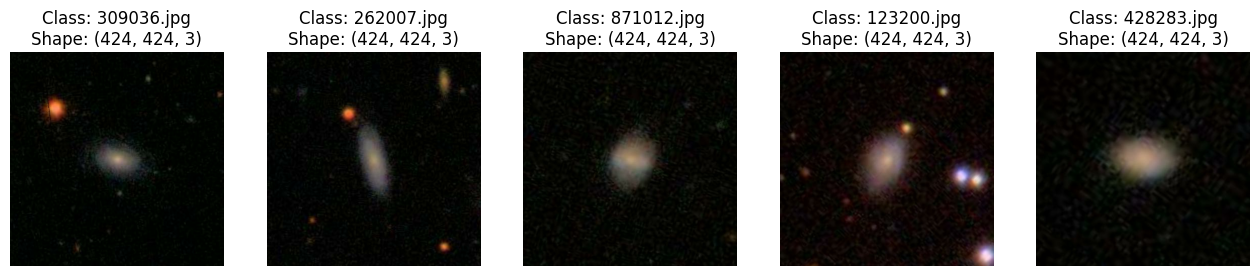

In [7]:
plot_random_galaxy(trainPath)

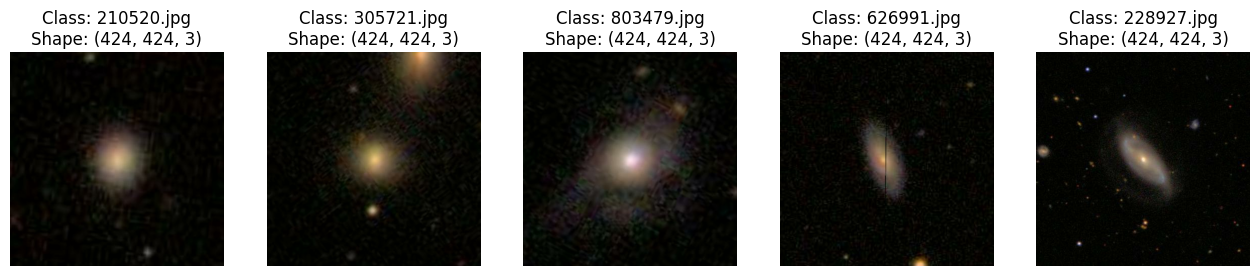

In [8]:
plot_random_galaxy(testPath)

In [88]:
ORIG_SHAPE = (424,424)
CROP_SIZE = (256,256)
IMG_SHAPE = (64,64)

tt = time.time()
def get_image(path, x1, y1, shape, crop_size): #Lee la imagen desde el path, la recorta y la redimensiona
    # Usar TensorFlow para leer la imagen (igual que en plot_random_galaxy que funciona)
    img = tf.io.read_file(path)
    img = tf.io.decode_image(img, channels=3)
    img = tf.cast(img, tf.float32)  # Convertir a float32
    
    # Recortar
    img = img[x1:x1+crop_size[0], y1:y1+crop_size[1]]
    
    # Redimensionar
    img = tf.image.resize(img, shape)
    
    # Normalizar (tf.io.decode_image devuelve 0-255 para JPG)
    img = img / 255.0
    
    return img.numpy()
    
def get_all_images(dataframe, shape=IMG_SHAPE, crop_size=CROP_SIZE): #Obtiene todas las imágenes del dataframe, las recorta y redimensiona
    x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
    y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
   
    sel = dataframe.values
    ids = sel[:,0].astype(int).astype(str)
    y_batch = sel[:,1:]
    x_batch = []
    for i in tqdm(ids):
        x = get_image('../GalaxyZoo/images_training_rev1/'+i+'.jpg', x1, y1, shape=shape, crop_size=crop_size)
        x_batch.append(x)
    x_batch = np.array(x_batch)
    return x_batch, y_batch
        
X_train, y_train = get_all_images(df_train)
X_test, y_test = get_all_images(df_test)
print('Procesado en: ', (time.time()-tt)/60, " minutos")


100%|██████████| 1000/1000 [00:01<00:00, 711.96it/s]

Procesado en:  0.12681925694147747  minutos


In [89]:
print("Forma del train: ",X_train.shape)
print("Forma del train: ",X_test.shape)

Forma del train:  (4000, 64, 64, 3)
Forma del train:  (1000, 64, 64, 3)


## Creamos la red neuronal

In [90]:
# Verificar disponibilidad de GPU
print("=" * 60)
print("VERIFICACIÓN DE GPU")
print("=" * 60)

# Listar dispositivos
gpus = tf.config.list_physical_devices('GPU')
cpus = tf.config.list_physical_devices('CPU')

print(f"\n✓ GPUs disponibles: {len(gpus)}")
for gpu in gpus:
    print(f"  - {gpu}")
    
print(f"\n✓ CPUs disponibles: {len(cpus)}")
for cpu in cpus:
    print(f"  - {cpu}")

# Verificar si CUDA está disponible
print(f"\n✓ TensorFlow versión: {tf.__version__}")
print(f"✓ Built with CUDA: {tf.test.is_built_with_cuda()}")

# Habilitar crecimiento de memoria GPU (evita OOM)
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("\n✓ Crecimiento de memoria GPU habilitado")
    except RuntimeError as e:
        print(f"\n✗ Error configurando memoria: {e}")
else:
    print("\n⚠ ADVERTENCIA: No se detectaron GPUs. El entrenamiento será MÁS LENTO.")

print("=" * 60 + "\n")

VERIFICACIÓN DE GPU

✓ GPUs disponibles: 0

✓ CPUs disponibles: 1
  - PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')

✓ TensorFlow versión: 2.19.0
✓ Built with CUDA: True

⚠ ADVERTENCIA: No se detectaron GPUs. El entrenamiento será MÁS LENTO.



In [91]:
# Estrategia de distribución para GPU
strategy = None
if gpus:
    print(f"Usando {len(gpus)} GPU(s) para entrenamiento")
    strategy = tf.distribute.OneDeviceStrategy(device="/gpu:0")
else:
    print("Usando CPU para entrenamiento")
    strategy = tf.distribute.get_strategy()

print(f"Número de réplicas: {strategy.num_replicas_in_sync}\n")

Usando CPU para entrenamiento
Número de réplicas: 1



In [92]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D
from keras import backend as K
from tensorflow.keras import layers #type: ignore

# Crear el modelo dentro de la estrategia de distribución
with strategy.scope():
    model = Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SHAPE[0], IMG_SHAPE[1], 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        GlobalMaxPooling2D(),
        tf.keras.layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(37, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['mse', 'mae'])
                  
model.summary()

/home/saintsaens/Documents/ML-team/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 62, 62, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 29, 29, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_2          │ (None, 256)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 37)             │         2,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 481,957 (1.84 MB)

 Trainable params: 481,061 (1.84 MB)

 Non-trainable params: 896 (3.50 KB)

In [93]:
print("\n" + "="*60)
print("INICIANDO ENTRENAMIENTO")
print("="*60)

t = time.time()

# Entrenar con callbacks y monitoreo
history = model.fit(
    X_train, y_train, 
    epochs=4, 
    batch_size=256,  # Aumentar batch_size también ayuda a GPU
    validation_data=(X_test, y_test),
    verbose=1  # Mostrar progreso detallado
)

tiempo_entrenamiento = time.time() - t
print(f"\n✓ Tiempo de entrenamiento: {tiempo_entrenamiento:.2f} segundos")
print(f"✓ Tiempo promedio por epoch: {tiempo_entrenamiento/5:.2f} segundos")
print(f"\n✓ Tiempo de entrenamiento: {tiempo_entrenamiento/60:.2f} minutos")
print(f"✓ Tiempo promedio por epoch: {tiempo_entrenamiento/(5*60):.2f} minutos")
print("="*60)


INICIANDO ENTRENAMIENTO
Epoch 1/4
16/16 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - loss: 1.0862 - mae: 0.3912 - mse: 0.2327 - val_loss: 0.6640 - val_mae: 0.3954 - val_mse: 0.1725
Epoch 2/4
16/16 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - loss: 0.4914 - mae: 0.2429 - mse: 0.0947 - val_loss: 0.6368 - val_mae: 0.3796 - val_mse: 0.1590
Epoch 3/4
16/16 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - loss: 0.3957 - mae: 0.1733 - mse: 0.0564 - val_loss: 0.5695 - val_mae: 0.3379 - val_mse: 0.1261
Epoch 4/4
16/16 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - loss: 0.3591 - mae: 0.1461 - mse: 0.0431 - val_loss: 0.4885 - val_mae: 0.2819 - val_mse: 0.0889

✓ Tiempo de entrenamiento: 141.47 segundos
✓ Tiempo promedio por epoch: 28.29 segundos

✓ Tiempo de entrenamiento: 2.36 minutos
✓ Tiempo promedio por epoch: 0.47 minutos


PREDICCIONES EN CONJUNTO DE TRAINING

DEBUG Muestra 1:
  Min valor imagen: 0.0000
  Max valor imagen: 0.9255
  Shape imagen: (64, 64, 3)

Muestra 1 - Índice: 3966
Clases con probabilidad real > 0.5:
  Clase 0: 0.9193
  Clase 14: 0.9592
  Clase 16: 0.7080

Clases con probabilidad predicha > 0.5:
  Clase 1: 0.5066
  Clase 14: 0.5991

Accuracy en esta muestra: 91.89%

DEBUG Muestra 2:
  Min valor imagen: 0.0000
  Max valor imagen: 0.8686
  Shape imagen: (64, 64, 3)

Muestra 2 - Índice: 625
Clases con probabilidad real > 0.5:
  Clase 1: 0.9063
  Clase 4: 0.8822
  Clase 6: 0.8599
  Clase 8: 0.6676
  Clase 11: 0.6699
  Clase 13: 0.6800
  Clase 18: 0.6800

Clases con probabilidad predicha > 0.5:
  Clase 1: 0.5109
  Clase 14: 0.5911

Accuracy en esta muestra: 81.08%

DEBUG Muestra 3:
  Min valor imagen: 0.0000
  Max valor imagen: 0.6520
  Shape imagen: (64, 64, 3)

Muestra 3 - Índice: 178
Clases con probabilidad real > 0.5:
  Clase 1: 0.6206
  Clase 4: 0.5036
  Clase 6: 0.5036
  Clase 14: 0.95

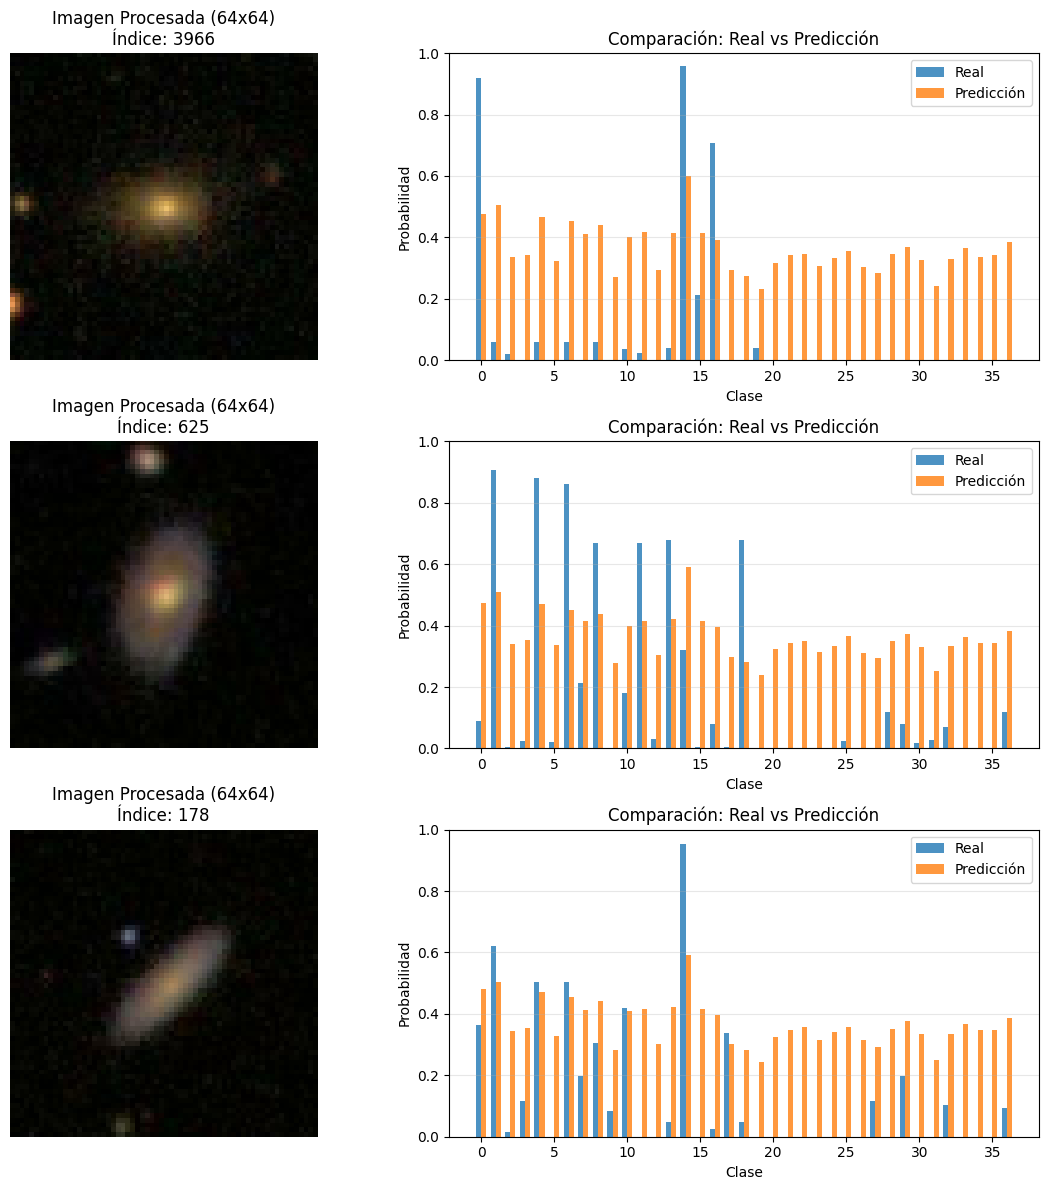



PREDICCIONES EN CONJUNTO DE TEST

DEBUG Muestra 1:
  Min valor imagen: 0.0000
  Max valor imagen: 0.8392
  Shape imagen: (64, 64, 3)

Muestra 1 - Índice: 498
Clases con probabilidad real > 0.5:
  Clase 0: 0.7085
  Clase 14: 0.7754
  Clase 15: 0.6190

Clases con probabilidad predicha > 0.5:
  Clase 1: 0.5214
  Clase 14: 0.5770

Accuracy en esta muestra: 91.89%

DEBUG Muestra 2:
  Min valor imagen: 0.0000
  Max valor imagen: 0.9794
  Shape imagen: (64, 64, 3)

Muestra 2 - Índice: 342
Clases con probabilidad real > 0.5:
  Clase 1: 0.8662
  Clase 3: 0.7804
  Clase 14: 0.9660

Clases con probabilidad predicha > 0.5:
  Clase 1: 0.5165
  Clase 14: 0.6014

Accuracy en esta muestra: 97.30%

DEBUG Muestra 3:
  Min valor imagen: 0.0000
  Max valor imagen: 0.9324
  Shape imagen: (64, 64, 3)

Muestra 3 - Índice: 634
Clases con probabilidad real > 0.5:
  Clase 1: 0.8345
  Clase 4: 0.5151
  Clase 13: 0.9278
  Clase 23: 0.6609

Clases con probabilidad predicha > 0.5:
  Clase 1: 0.5168
  Clase 14: 0.

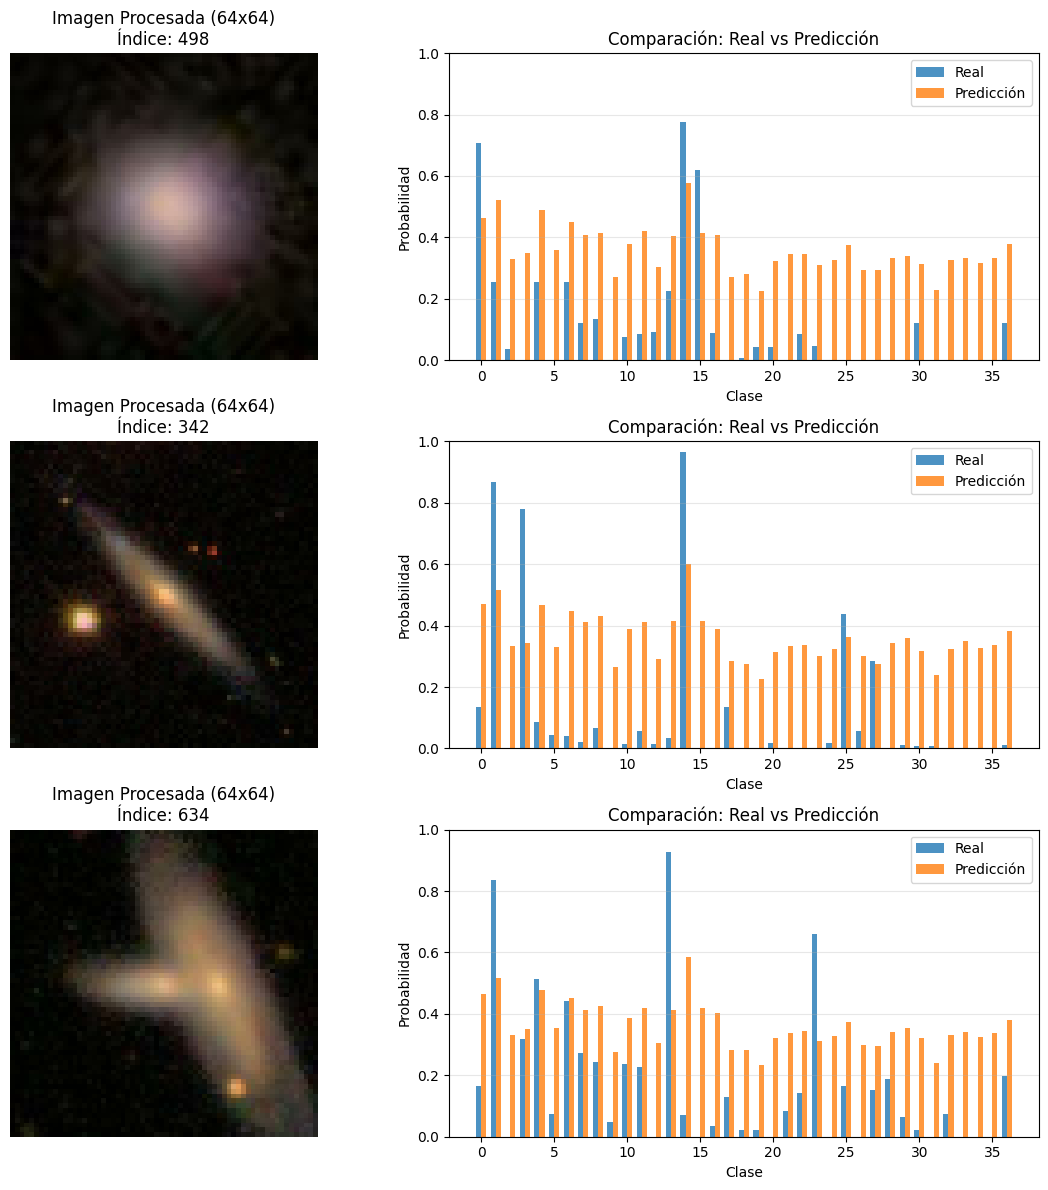



UNA SOLA MUESTRA

DEBUG Muestra 1:
  Min valor imagen: 0.0000
  Max valor imagen: 0.6431
  Shape imagen: (64, 64, 3)

Muestra 1 - Índice: 858
Clases con probabilidad real > 0.5:
  Clase 1: 0.9155
  Clase 4: 0.9155
  Clase 6: 0.8552
  Clase 7: 0.6413
  Clase 10: 0.7905
  Clase 14: 0.6945

Clases con probabilidad predicha > 0.5:
  Clase 1: 0.5081
  Clase 14: 0.5883

Accuracy en esta muestra: 89.19%


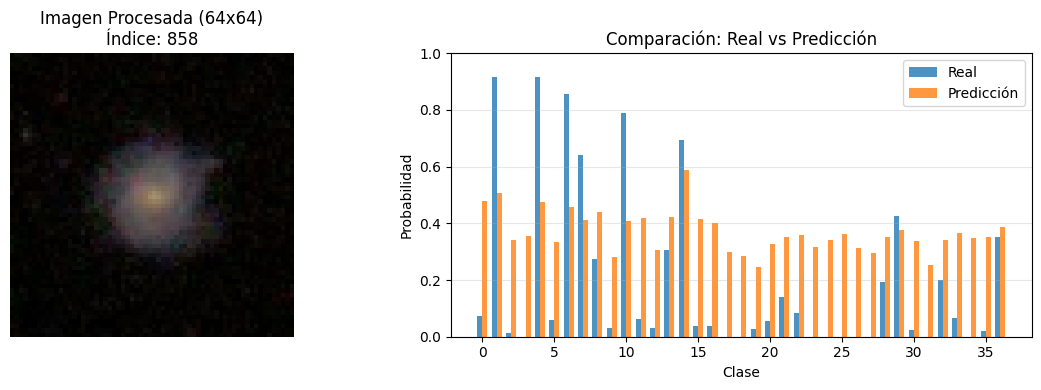

In [95]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage.transform import resize

def predict_random_galaxy(model, X_data, y_data, data_path, num_samples=3):
    """
    Visualiza predicciones del modelo en imágenes random
    
    Args:
        model: Modelo entrenado
        X_data: Datos de imágenes procesadas (train o test)
        y_data: Etiquetas reales (train o test)
        data_path: Ruta de las imágenes originales
        num_samples: Número de muestras a visualizar
    """
    
    # Seleccionar índices random
    random_indices = random.sample(range(len(X_data)), num_samples)
    
    fig, axes = plt.subplots(num_samples, 2, figsize=(12, 4*num_samples))
    
    if num_samples == 1:
        axes = [axes]
    
    for idx, random_idx in enumerate(random_indices):
        # Obtener imagen procesada y etiqueta real
        img_processed = X_data[random_idx]
        y_real = y_data[random_idx]
        
        # Hacer predicción
        y_pred = model.predict(np.expand_dims(img_processed, axis=0), verbose=0)[0]
        
        # DEBUG: Verificar valores de la imagen
        print(f"\nDEBUG Muestra {idx+1}:")
        print(f"  Min valor imagen: {img_processed.min():.4f}")
        print(f"  Max valor imagen: {img_processed.max():.4f}")
        print(f"  Shape imagen: {img_processed.shape}")
        
        # Mostrar imagen procesada (izquierda) - Asegurar que se muestre correctamente
        # vmin y vmax garantizan que matplotlib interprete bien los valores normalizados
        axes[idx][0].imshow(img_processed, vmin=0, vmax=1, cmap='viridis')
        axes[idx][0].set_title(f'Imagen Procesada (64x64)\nÍndice: {random_idx}')
        axes[idx][0].axis('off')
        
        # Mostrar gráfico de predicciones vs reales (derecha)
        x_pos = np.arange(len(y_real))
        width = 0.35
        
        axes[idx][1].bar(x_pos - width/2, y_real, width, label='Real', alpha=0.8)
        axes[idx][1].bar(x_pos + width/2, y_pred, width, label='Predicción', alpha=0.8)
        axes[idx][1].set_xlabel('Clase')
        axes[idx][1].set_ylabel('Probabilidad')
        axes[idx][1].set_title(f'Comparación: Real vs Predicción')
        axes[idx][1].legend()
        axes[idx][1].set_ylim([0, 1])
        axes[idx][1].grid(axis='y', alpha=0.3)
        
        # Imprimir información detallada
        print(f"\n{'='*60}")
        print(f"Muestra {idx+1} - Índice: {random_idx}")
        print(f"{'='*60}")
        print(f"Clases con probabilidad real > 0.5:")
        for i, prob in enumerate(y_real):
            if prob > 0.5:
                print(f"  Clase {i}: {prob:.4f}")
        
        print(f"\nClases con probabilidad predicha > 0.5:")
        for i, prob in enumerate(y_pred):
            if prob > 0.5:
                print(f"  Clase {i}: {prob:.4f}")
        
        # Calcular accuracy por muestra
        accuracy = np.mean((y_pred > 0.5) == (y_real > 0.5))
        print(f"\nAccuracy en esta muestra: {accuracy*100:.2f}%")
    
    plt.tight_layout()
    plt.show()

# ============================================
# USAR LA FUNCIÓN
# ============================================

# Opción 1: Predecir en imágenes de TRAINING
print("PREDICCIONES EN CONJUNTO DE TRAINING")
predict_random_galaxy(model, X_train, y_train, trainPath, num_samples=3)

# Opción 2: Predecir en imágenes de TEST
print("\n\nPREDICCIONES EN CONJUNTO DE TEST")
predict_random_galaxy(model, X_test, y_test, testPath, num_samples=3)

# Opción 3: Una sola muestra específica
print("\n\nUNA SOLA MUESTRA")
predict_random_galaxy(model, X_test, y_test, testPath, num_samples=1)
